In [105]:
import seaborn as sns

In [106]:
%run ../notebooks/ai_model.ipynb

{'target': 'SalePrice', 'features': 'Overall Qual'}
model type: ModelType.LINEAR_REGRESSION
Mean Squared Error: 2796154624.8908944
R-squared: 0.651245661518071


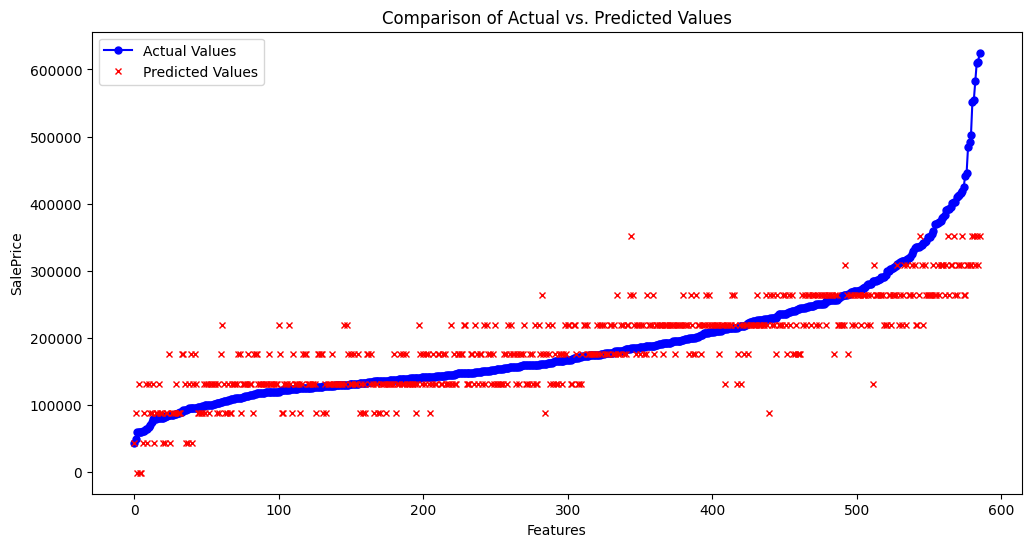

In [107]:
model =(AiModel.assemble()
        .set_model_type(ModelType.LINEAR_REGRESSION)
        .load_features(['Overall Qual'])
        .build()  
)
model.print_meta_data()
model.display()

Test-model to see what would happen if we used only one metric to train the AI model. We chose overall quality as it has the best correlation with sale price. Since overall quality was more of a category than a numerical value, the outcome looked strange, but it is quite demonstrative as it shows that the linear regression model is just returning the y-value for the given x-value of the linear equation it has produced.

{'target': 'SalePrice', 'features': 'Overall Qual'}
model type: ModelType.RANDOM_FOREST_REGRESSION
Mean Squared Error: 2197222159.077552
R-squared: 0.7259483600207453


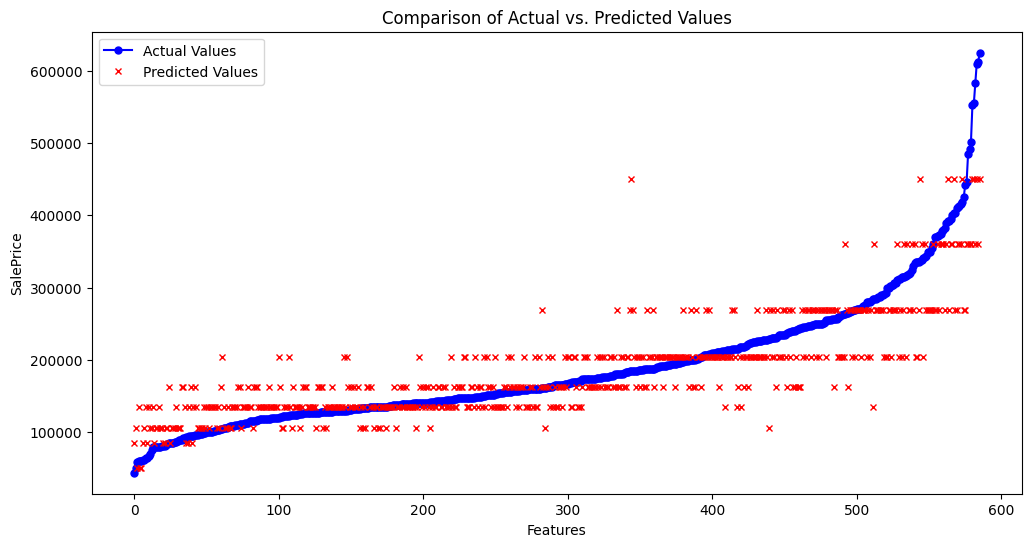

In [108]:
model =(AiModel.assemble()
        .set_model_type(ModelType.RANDOM_FOREST_REGRESSION)
        .load_features(['Overall Qual'])
        .build()  
)
model.print_meta_data()
model.display()

The Random forest does something similar to the linear regression model, but produses a slightly better result as it is a bit better fitted since it does not need to restrict itself by producing a straight line.

{'target': 'SalePrice', 'features': 'Overall Qual, Year Built'}
model type: ModelType.LINEAR_REGRESSION
Mean Squared Error: 2730523714.413276
R-squared: 0.6594315696090736


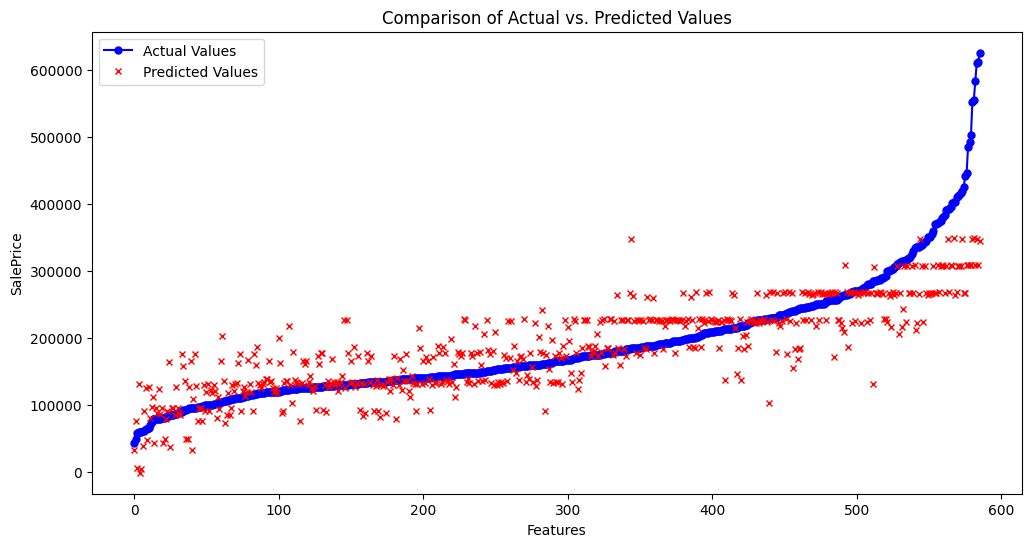

In [109]:
model =(AiModel.assemble()
        .set_model_type(ModelType.LINEAR_REGRESSION)
        .load_features(['Overall Qual', 'Year Built'])
        .build()  
)
model.print_meta_data()
model.display()

Using another value with good correlation with sale price does not help the model much. It still produces a similar pattern with predictons following the points where the overall quality value meats the regression line. There is some slight variety this time atleast.

{'target': 'SalePrice', 'features': 'Overall Qual, Year Built'}
model type: ModelType.RANDOM_FOREST_REGRESSION
Mean Squared Error: 2255051463.551283
R-squared: 0.7187355182676205


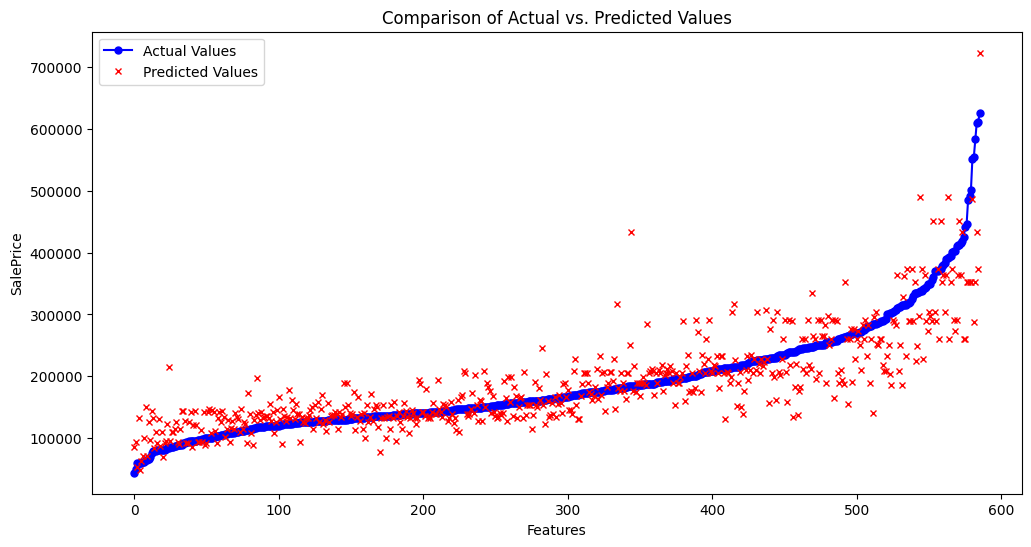

In [110]:
model =(AiModel.assemble()
        .set_model_type(ModelType.RANDOM_FOREST_REGRESSION)
        .load_features(['Overall Qual', 'Year Built'])
        .build()  
)
model.print_meta_data()
model.display()

Random forest is somehow doing worse with more data. I can not explain why other than it being random.

{'target': 'SalePrice', 'features': 'Overall Qual, Year Built', 'n_estimators': 150, 'random_state': 7}
model type: ModelType.RANDOM_FOREST_REGRESSION
Mean Squared Error: 2268861640.3833785
R-squared: 0.7170130244389454


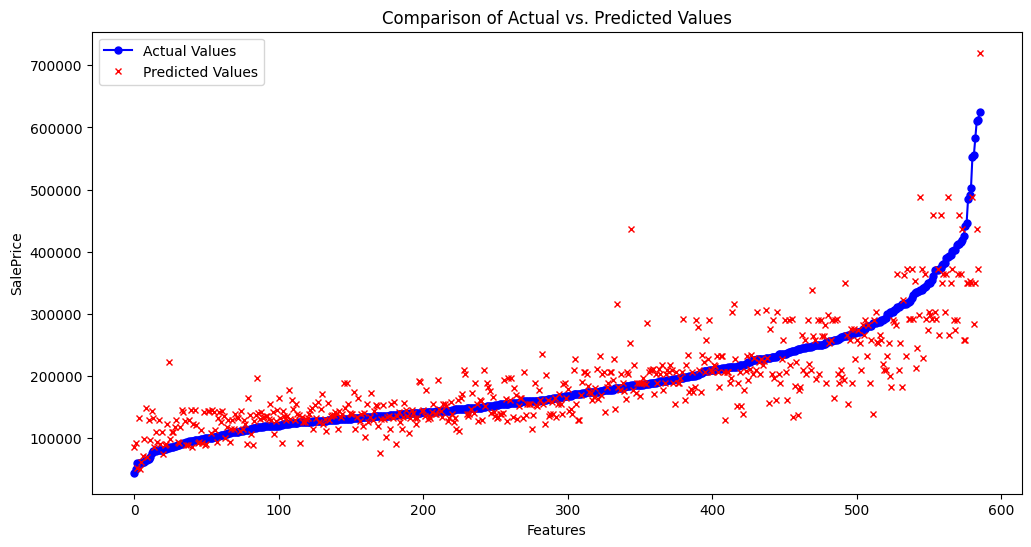

In [111]:
model =(AiModel.assemble()
        .add_meta_data('n_estimators', 150)
        .add_meta_data('random_state', 7)
        .set_model_type(ModelType.RANDOM_FOREST_REGRESSION)
        .load_features(['Overall Qual', 'Year Built'])
        .build()  
)
model.print_meta_data()
model.display()

Increasing the n estimators also makes the predictions worse. The pattern indicates that both in this and the last model there is a trend of being able to hit the exact value more often, but there are also bigger misses.

{'target': 'SalePrice', 'features': 'Overall Qual, Year Built, Year Remod/Add'}
model type: ModelType.LINEAR_REGRESSION
Mean Squared Error: 2705593267.4012046
R-squared: 0.6625410548565472


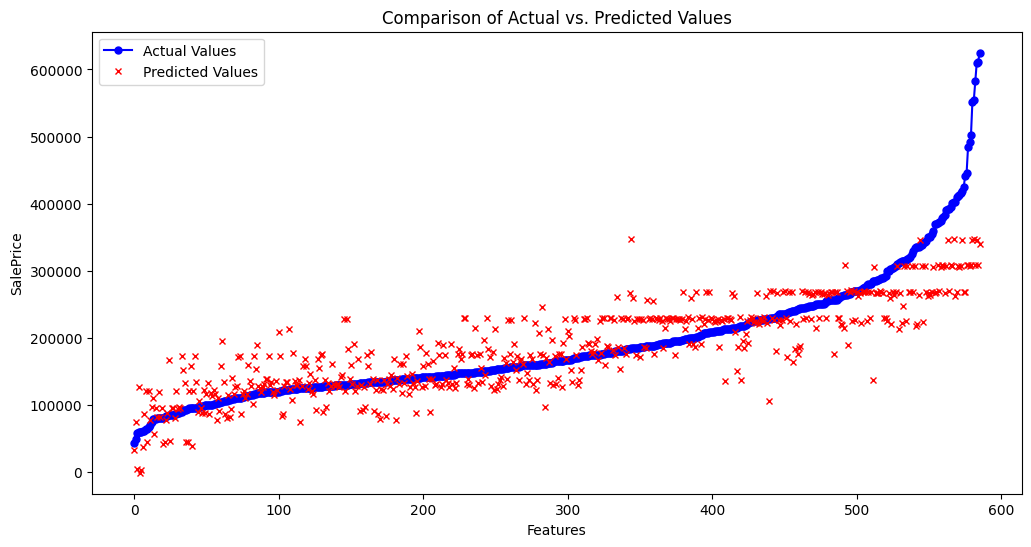

In [112]:
model =(AiModel.assemble()
        .set_model_type(ModelType.LINEAR_REGRESSION)
        .load_features(['Overall Qual', 'Year Built', 'Year Remod/Add'])
        .build()  
)
model.print_meta_data()
model.display()

Even after adding another datatype with high correlation with sale price the linear regression model-type is still struggeling to produce results.

{'target': 'SalePrice', 'features': 'Overall Qual, Year Built, Year Remod/Add'}
model type: ModelType.RANDOM_FOREST_REGRESSION
Mean Squared Error: 2263900560.632195
R-squared: 0.7176318021243344


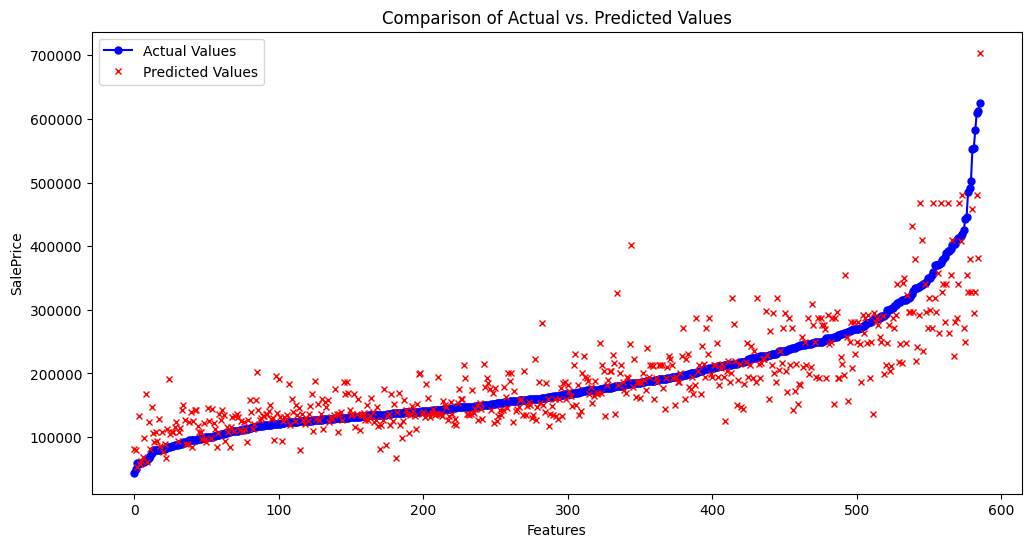

In [113]:
model =(AiModel.assemble()
        .set_model_type(ModelType.RANDOM_FOREST_REGRESSION)
        .load_features(['Overall Qual', 'Year Built', 'Year Remod/Add'])
        .build()  
)
model.print_meta_data()
model.display()

Adding just one more dimention to the random forest does not help much eihter. It might be a result of the data-types correlating with eachother to a larg extent as well as correlationg with the sale price.

{'target': 'SalePrice', 'features': 'All Available', 'n_estimators': 250}
model type: ModelType.RANDOM_FOREST_REGRESSION
Mean Squared Error: 704955033.0093693
R-squared: 0.912073486920888


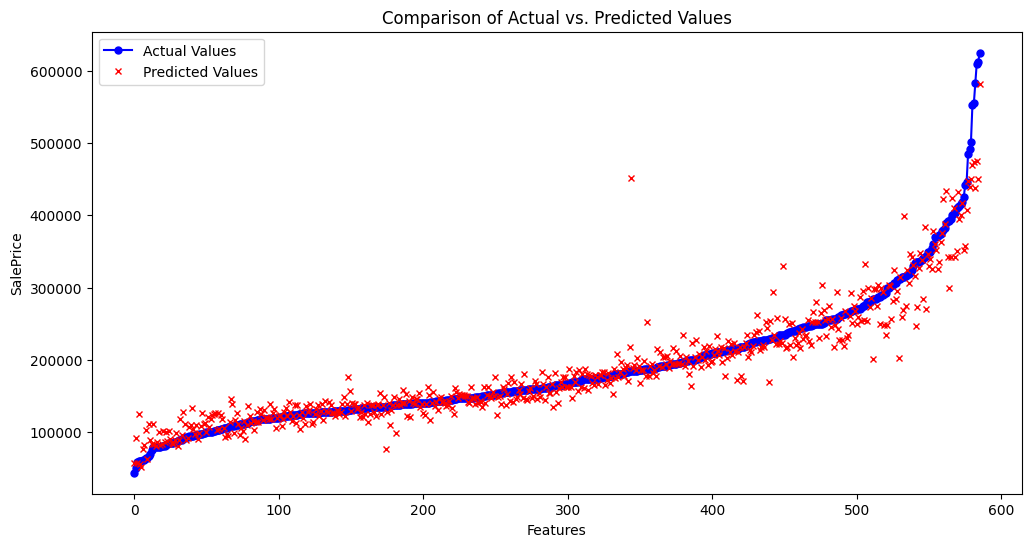

In [114]:
model =(AiModel.assemble()
        .set_model_type(ModelType.RANDOM_FOREST_REGRESSION)
        .add_meta_data('n_estimators', 250)
        .add_all_features('../data/processed/housing_encoded.csv', 
                          ['SalePrice', 'PID', 'Order'])
        .build()  
)
model.print_meta_data()
model.display()

This model includes all but the listed features. It is by far the best preforming even though over half of the features are just considered noise.

{'target': 'SalePrice', 'features': 'Lot Frontage, Lot Area, Overall Qual, Year Built, Year Remod/Add, Mas Vnr Area, BsmtFin SF 1, Total Bsmt SF, 1st Flr SF, Total Bsmt SF, 2nd Flr SF, Gr Liv Area, Bsmt Full Bath, Full Bath, Half Bath, TotRms AbvGrd, Fireplaces, Garage Yr Blt, Garage Cars, Wood Deck SF, Open Porch SF', 'n_estimators': 250}
model type: ModelType.RANDOM_FOREST_REGRESSION
Mean Squared Error: 753780328.8548371
R-squared: 0.9059836828727892


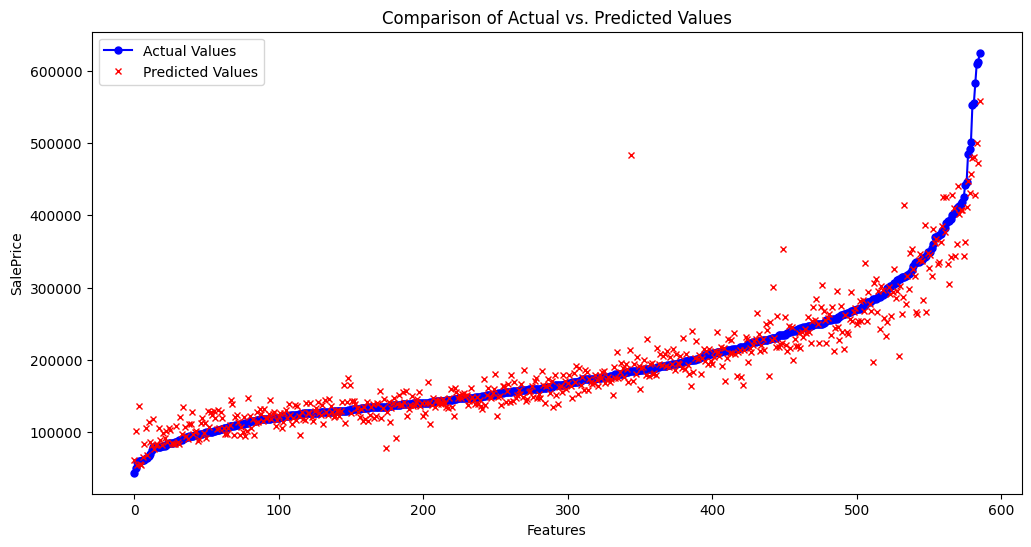

In [115]:
model =(AiModel.assemble()
        .set_model_type(ModelType.RANDOM_FOREST_REGRESSION)
        .add_meta_data('n_estimators', 250)
        .load_features(['Lot Frontage', 'Lot Area', 'Overall Qual', 
                       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 
                       'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
                       'Total Bsmt SF', '2nd Flr SF',
                       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath',
                       'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 
                       'Garage Yr Blt', 'Garage Cars', 'Wood Deck SF',
                       'Open Porch SF'], '../data/processed/housing_encoded.csv')
        .build()  
)
model.print_meta_data()
model.display()

This is the model we predicted would be the best preforming. It contains all features with a relevant correlation to the sale price.

In [119]:
# Last inn datasettet
housing = pd.read_csv('../data/raw/AmesHousing.csv')

# Identifiser kategoriske kolonner
categorical_cols = housing.select_dtypes(include=['object']).columns

# Fyll manglende verdier med 'Unknown'
housing[categorical_cols] = housing[categorical_cols].fillna('Unknown')

# One-hot encode de kategoriske kolonnene
housing_encoded = pd.get_dummies(housing, columns=categorical_cols, drop_first=True)

# Sjekk resultatet
print(housing_encoded.head())

   Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0      1  526301100           20         141.0     31770             6   
1      2  526350040           20          80.0     11622             5   
2      3  526351010           20          81.0     14267             6   
3      4  526353030           20          93.0     11160             7   
4      5  527105010           60          74.0     13830             5   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
0             5        1960            1960         112.0  ...   
1             6        1961            1961           0.0  ...   
2             6        1958            1958         108.0  ...   
3             5        1968            1968           0.0  ...   
4             5        1997            1998           0.0  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0            False          False          False          False   
1            False      

In [120]:
# Definer mÃ¥lvariabel (SalePrice) og uavhengige variabler
X = housing_encoded.drop(columns=['SalePrice'])
y = housing_encoded['SalePrice']

# Del datasettet i trenings- og testsett (70% treningsdata, 30% testdata)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Konverter ikke-numeriske kolonner til numeriske (om nødvendig)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Sjekk for manglende verdier
print(X_train.isnull().sum())
print(X_test.isnull().sum())

# Fyll manglende verdier med 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Hvis du har brukt one-hot encoding, kan du sikre at X_test har samme kolonner som X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Order                       0
PID                         0
MS SubClass                 0
Lot Frontage              347
Lot Area                    0
                         ... 
Sale Condition_AdjLand      0
Sale Condition_Alloca       0
Sale Condition_Family       0
Sale Condition_Normal       0
Sale Condition_Partial      0
Length: 278, dtype: int64
Order                       0
PID                         0
MS SubClass                 0
Lot Frontage              143
Lot Area                    0
                         ... 
Sale Condition_AdjLand      0
Sale Condition_Alloca       0
Sale Condition_Family       0
Sale Condition_Normal       0
Sale Condition_Partial      0
Length: 278, dtype: int64


In [121]:
from sklearn.linear_model import LinearRegression

# Tren modellen
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [122]:
from sklearn.metrics import mean_squared_error, r2_score

# Gjør prediksjoner på testdata
y_pred = model.predict(X_test)

# Beregn MSE og R²-score for testdata
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 1451091865.1470168
R² Score: 0.793568995738504


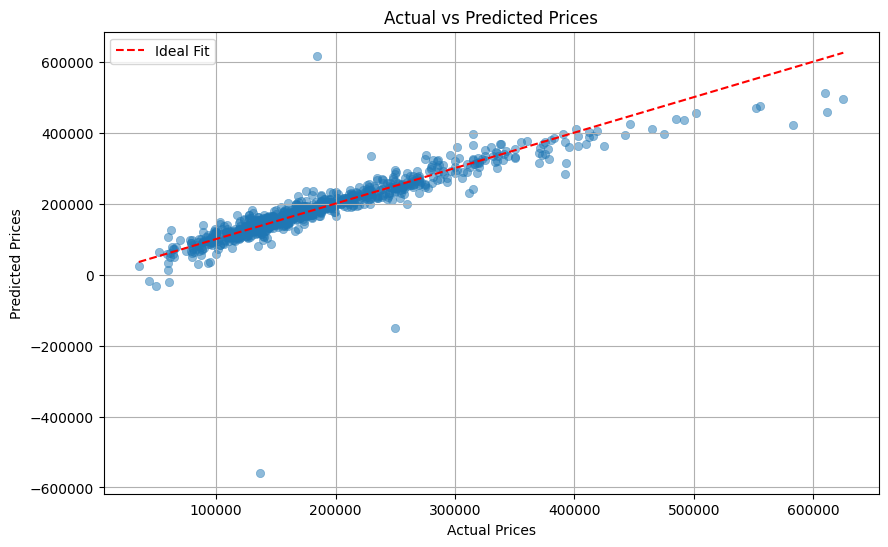

In [123]:
# Funksjon for å plotte resultater
def plot_regression_results(y_test, y_pred):
    results_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })
    results_df = results_df.sort_values(by='Actual')

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.5, edgecolor=None)
    plt.plot(results_df['Actual'], results_df['Actual'], color='red', linestyle='--', label='Ideal Fit')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot testresultater
plot_regression_results(y_test, y_pred)

Attempting the same strategy with linear regression results in a subpar performance from the model, which makes sense given that the data is not distributed linearly.